In [10]:
# !pip install mlxtend


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mlxtend.frequent_patterns import apriori , association_rules
from sklearn.preprocessing import LabelEncoder

In [12]:
train =  pd.read_csv('../train.csv')
test =  pd.read_csv('../test.csv')

print('Train data shape:' , train.shape)
print('Test data shape:' , test.shape)

train.drop(columns=['Unnamed: 0','id'],inplace = True)
test.drop(columns=['Unnamed: 0','id'],inplace = True)
# X = train.drop( satisfaction , axis=1)
X = train
train

Train data shape: (103904, 25)
Test data shape: (25976, 25)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [13]:
for i in X.columns:
    X[i] = X[i].astype( str )

# change the categorical data to one hot encoded different columns 
# as the apriori algorithm takes only numerical data 
train_encoded = pd.get_dummies(X)

frequent_itemsets = apriori(train_encoded, min_support=0.25, use_colnames=True)

frequent_itemsets 


,support,itemsets
0,0.507459,(Gender_Female)
1,0.492541,(Gender_Male)
2,0.817322,(Customer Type_Loyal Customer)
3,0.689627,(Type of Travel_Business travel)
4,0.310373,(Type of Travel_Personal Travel)
...,...,...
77,0.257892,"(Class_Business, Departure Delay in Minutes_0,..."
78,0.260019,"(Class_Business, Arrival Delay in Minutes_0.0,..."
79,0.329304,"(satisfaction_satisfied, Type of Travel_Busine..."
80,0.314415,"(Arrival Delay in Minutes_0.0, Departure Delay..."


In [14]:
rules_df = association_rules(frequent_itemsets, metric= 'lift' , min_threshold=1)
rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Type of Travel_Business travel),(Gender_Female),0.689627,0.507459,0.351555,0.509776,1.004566,0.001598,1.004727,0.014645
1,(Gender_Female),(Type of Travel_Business travel),0.507459,0.689627,0.351555,0.692776,1.004566,0.001598,1.010250,0.009229
2,(Departure Delay in Minutes_0),(Gender_Female),0.564637,0.507459,0.286794,0.507926,1.000921,0.000264,1.000949,0.002113
3,(Gender_Female),(Departure Delay in Minutes_0),0.507459,0.564637,0.286794,0.565156,1.000921,0.000264,1.001195,0.001867
4,(satisfaction_neutral or dissatisfied),(Gender_Female),0.566667,0.507459,0.290586,0.512797,1.010520,0.003025,1.010958,0.024025
...,...,...,...,...,...,...,...,...,...,...
123,"(Class_Business, Type of Travel_Business travel)","(satisfaction_satisfied, Customer Type_Loyal C...",0.457230,0.390100,0.301307,0.658984,1.689267,0.122941,1.788476,0.751749
124,(satisfaction_satisfied),"(Class_Business, Type of Travel_Business trave...",0.433333,0.386539,0.301307,0.695325,1.798845,0.133807,2.013490,0.783684
125,(Customer Type_Loyal Customer),"(satisfaction_satisfied, Type of Travel_Busine...",0.817322,0.329304,0.301307,0.368652,1.119487,0.032160,1.062323,0.584273
126,(Type of Travel_Business travel),"(satisfaction_satisfied, Class_Business, Custo...",0.689627,0.303848,0.301307,0.436913,1.437934,0.091765,1.236314,0.981263


In [15]:
rules_df = rules_df.sort_values([ 'confidence' ,  'lift'], ascending =[False, False])
rules_df[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
72,"(satisfaction_neutral or dissatisfied, Type of...",(Customer Type_Loyal Customer),0.278815,0.817322,0.277487,0.995236,1.217680,0.049605,38.349193,0.247879
10,(Type of Travel_Personal Travel),(Customer Type_Loyal Customer),0.310373,0.817322,0.308795,0.994915,1.217286,0.055120,35.921894,0.258836
66,"(Type of Travel_Personal Travel, Class_Eco)",(Customer Type_Loyal Customer),0.254928,0.817322,0.253494,0.994375,1.216626,0.045136,32.475042,0.238976
105,"(satisfaction_satisfied, Class_Business)",(Type of Travel_Business travel),0.331845,0.689627,0.329304,0.992343,1.438957,0.100455,40.536600,0.456559
115,"(satisfaction_satisfied, Class_Business, Custo...",(Type of Travel_Business travel),0.303848,0.689627,0.301307,0.991638,1.437934,0.091765,37.116618,0.437487
98,"(Class_Business, Arrival Delay in Minutes_0.0)",(Type of Travel_Business travel),0.271395,0.689627,0.260019,0.958084,1.389278,0.072858,7.404576,0.384573
94,"(Class_Business, Departure Delay in Minutes_0)",(Type of Travel_Business travel),0.269345,0.689627,0.257892,0.957479,1.388401,0.072144,7.299244,0.382871
24,(Class_Business),(Type of Travel_Business travel),0.477989,0.689627,0.457230,0.956569,1.387082,0.127595,7.146350,0.534591
53,"(Class_Business, Customer Type_Loyal Customer)",(Type of Travel_Business travel),0.407193,0.689627,0.386539,0.949278,1.376509,0.105728,6.119093,0.461406
30,(satisfaction_satisfied),(Type of Travel_Business travel),0.433333,0.689627,0.401775,0.927174,1.344457,0.102937,4.261832,0.452126


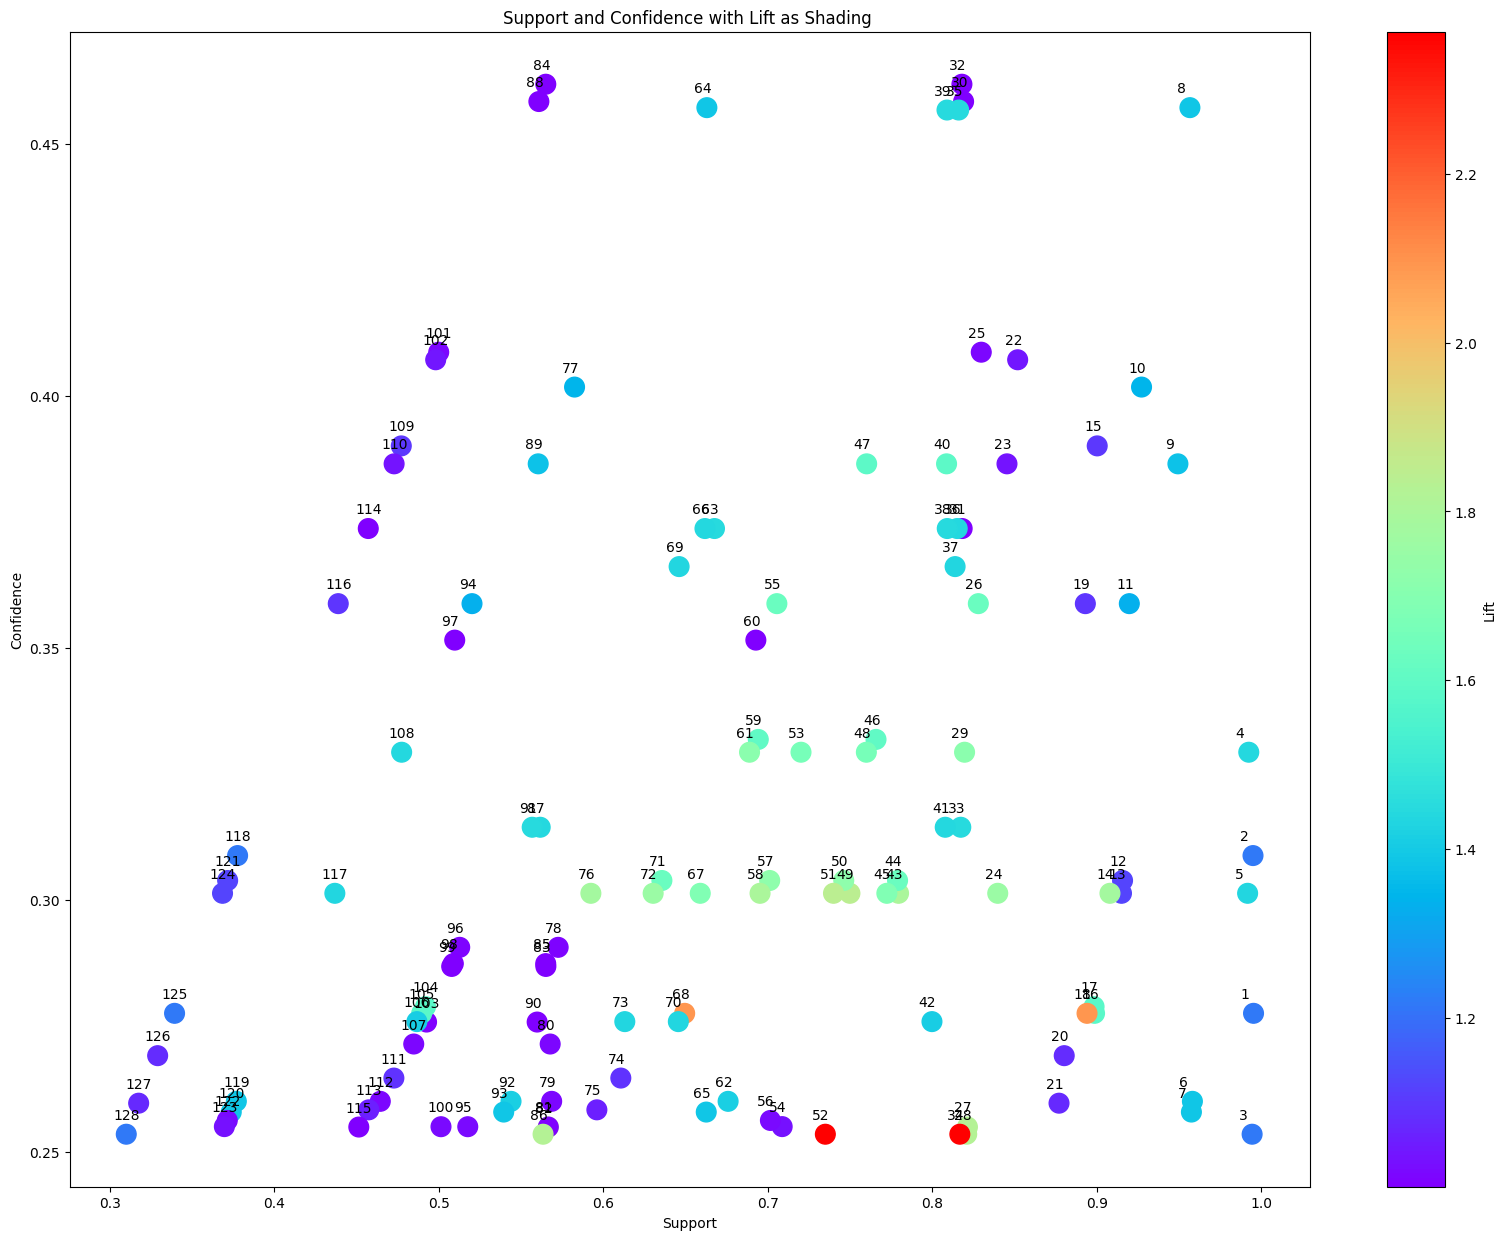

In [16]:
support = rules_df[ 'support' ].values
confidence = rules_df[ 'confidence' ].values
lift = rules_df[ 'lift' ].values


plt.figure(figsize=(20,15))
plt.scatter(confidence, support, c=lift, cmap= 'rainbow' , s=200)

for i in range(len(support)):
    plt.annotate(str(i+1), (confidence[i]-8e-3, support[i]+3e-3))
   
    
# Add colorbar
cbar = plt.colorbar()
cbar.set_label( 'Lift' )

plt.xlabel( 'Support' )
plt.ylabel( 'Confidence' )
plt.title( 'Support and Confidence with Lift as Shading ')

# Show the plot
plt.show()

**<font color='pink' >Most important rules</font>**
1.  Type of Travel = Personal Travel, satisfaction = neutral or dissatisfied   ---> Customer Type = Loyal Customer 

2.  Type of Travel = Personal Travel                                           ---> Customer Type = Loyal Customer  

3.  Class = Eco, Type of Travel = Personal Travel                              ---> Customer Type = Loyal Customer

4.  Class = Business, satisfaction = satisfied                                 ---> Type of Travel = Business travel 

5.  Customer Type = Loyal Customer, Class = Business, satisfaction = satisfied ---> Type of Travel = Business travel 

6.  Arrival Delay in Minutes = 0.0, Class = Business                           ---> Type of Travel = Business travel 

7.  Class = Business, Departure Delay in Minutes = 0                           ---> Type of Travel = Business travel 

8.  Class = Business                                                           ---> Type of Travel = Business travel 

9.  Customer Type = Loyal Customer, Class = Business                           ---> Type of Travel = Business travel 

10. satisfaction = satisfied                                                   ---> Type of Travel= Business travel 


**<font color='pink' >Conclusion</font>**
- We can see that (Type of Travel, Customer Type, Class) exist in many rules together, <br>
which means that there is a significant relation between them. 

- Customers whose flight for a personal travel are most likely loyal customers.
- Customers whose flight in a business class are most likely have a business travel.

# Satisfaction

In [17]:
rules_df = rules_df.sort_values([ 'confidence' ,  'lift' ], ascending =[False, False])
rules_df = rules_df[rules_df[ 'consequents' ].astype(str).str.contains( 'satisfaction' )]
rules_df[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
74,"(Type of Travel_Personal Travel, Customer Type...",(satisfaction_neutral or dissatisfied),0.308795,0.566667,0.277487,0.898613,1.585786,0.102503,4.274048,0.534426
35,(Type of Travel_Personal Travel),(satisfaction_neutral or dissatisfied),0.310373,0.566667,0.278815,0.898322,1.585273,0.102937,4.261832,0.535353
76,(Type of Travel_Personal Travel),"(satisfaction_neutral or dissatisfied, Custome...",0.310373,0.427221,0.277487,0.894043,2.092694,0.144889,5.405777,0.757144
43,(Class_Eco),(satisfaction_neutral or dissatisfied),0.449886,0.566667,0.366146,0.813862,1.436226,0.111210,2.328024,0.552124
85,"(Customer Type_Loyal Customer, Class_Eco)",(satisfaction_neutral or dissatisfied),0.344886,0.566667,0.275841,0.799805,1.411418,0.080406,2.164549,0.444950
117,"(Class_Business, Type of Travel_Business trave...",(satisfaction_satisfied),0.386539,0.433333,0.301307,0.779499,1.798845,0.133807,2.569903,0.723906
80,"(Class_Business, Customer Type_Loyal Customer)",(satisfaction_satisfied),0.407193,0.433333,0.303848,0.746201,1.722004,0.127398,2.232737,0.707281
122,"(Class_Business, Customer Type_Loyal Customer)","(satisfaction_satisfied, Type of Travel_Busine...",0.407193,0.401775,0.301307,0.739961,1.841731,0.137707,2.300519,0.770963
106,"(Class_Business, Type of Travel_Business travel)",(satisfaction_satisfied),0.457230,0.433333,0.329304,0.720216,1.662038,0.131171,2.025371,0.733882
62,"(Type of Travel_Business travel, Customer Type...",(satisfaction_satisfied),0.508527,0.433333,0.358793,0.705553,1.628201,0.138431,1.924513,0.785039


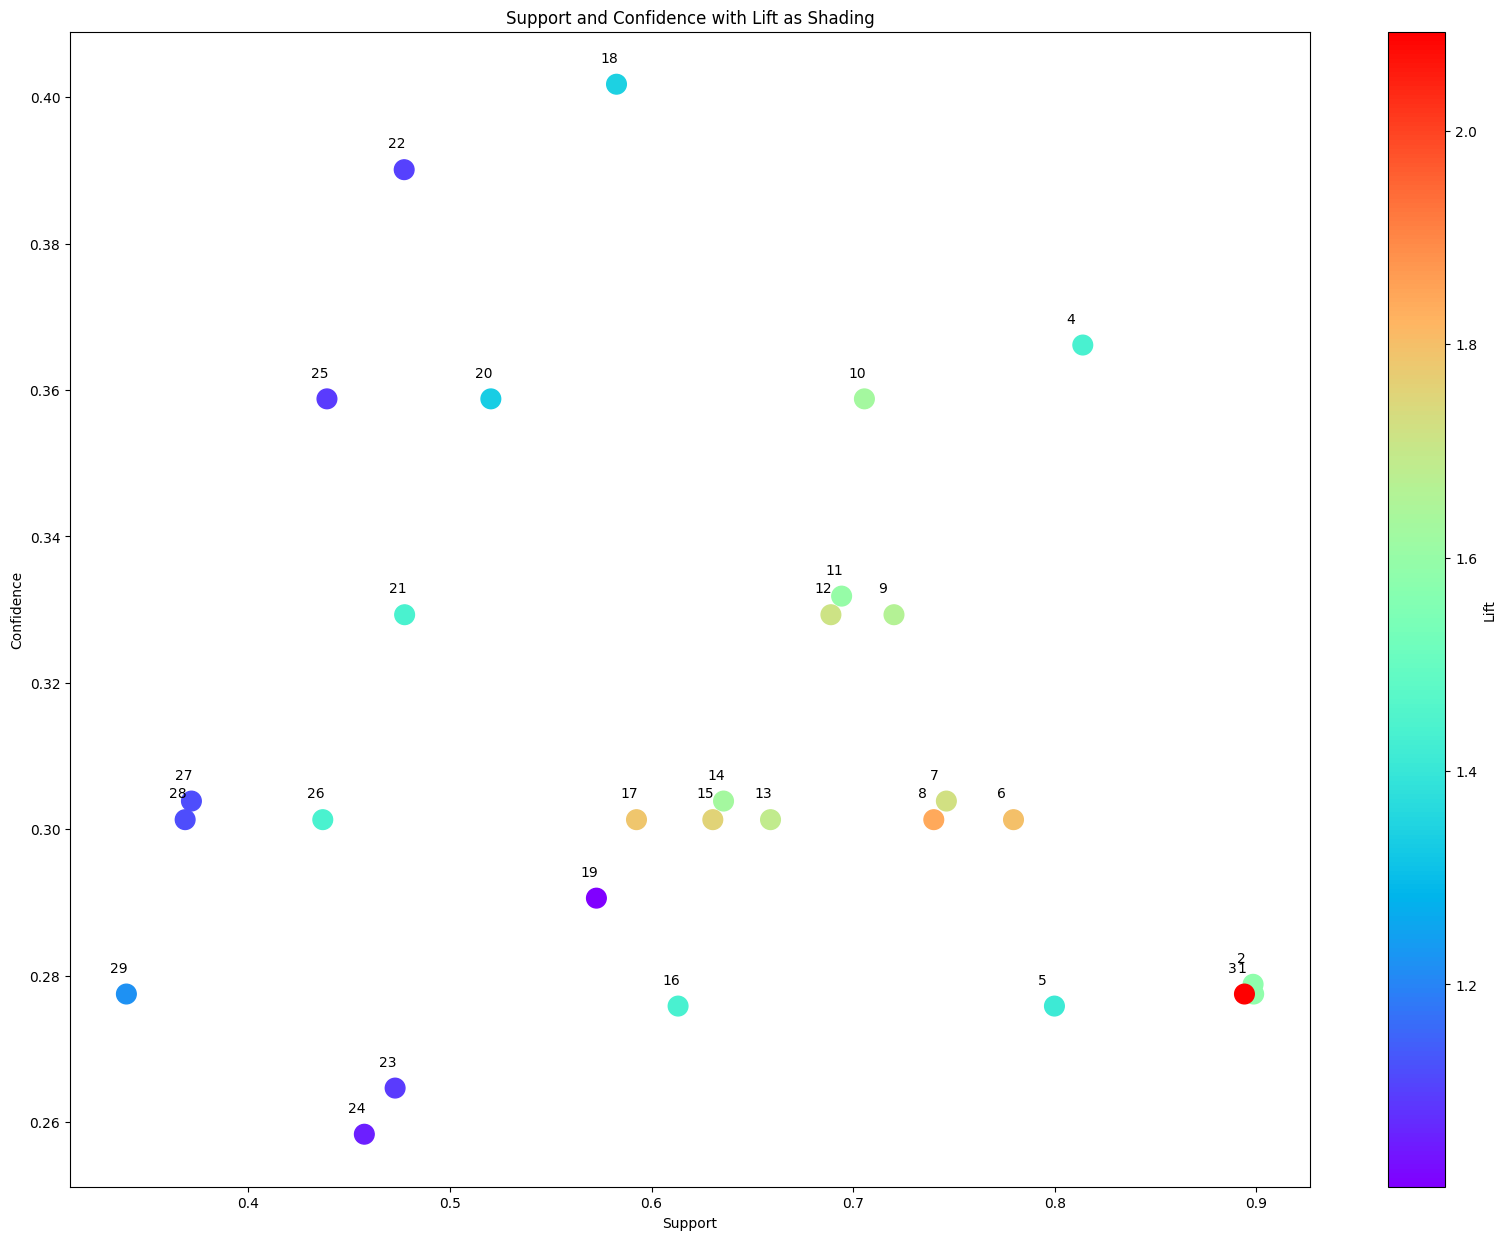

In [18]:
support = rules_df[ 'support' ].values
confidence = rules_df[ 'confidence' ].values
lift = rules_df[ 'lift' ].values


plt.figure(figsize=(20,15))
plt.scatter(confidence, support, c=lift, cmap= 'rainbow' , s=200)

for i in range(len(support)):
    plt.annotate(str(i+1), (confidence[i]-8e-3, support[i]+3e-3))
   
    
# Add colorbar
cbar = plt.colorbar()
cbar.set_label( 'Lift' )

plt.xlabel( 'Support' )
plt.ylabel( 'Confidence' )
plt.title( 'Support and Confidence with Lift as Shading' )

# Show the plot
plt.show()

**<font color='pink' >Most important rules related to satisfaction</font>**

1. Type of Travel= Personal Travel, Customer Type= Loyal Customer --->     satisfaction= neutral or dissatisfied  

2. Type of Travel= Personal Travel  --->    satisfaction= neutral or dissatisfied  

3. Type of Travel= Personal Travel  --->     Customer Type= Loyal Customer ,  satisfaction= neutral or dissatisfied   

4. Class= Eco                       --->    satisfaction= neutral or dissatisfied  

5. Class= Eco ,  Customer Type= Loyal Customer     --->    satisfaction= neutral or dissatisfied  

6. Customer Type= Loyal Customer ,  Class= Business ,  Type of Travel= Business travel    --->    satisfaction= satisfied  

7. Customer Type= Loyal Customer ,  Class= Business --->    satisfaction= satisfied  

8. Customer Type= Loyal Customer ,  Class= Business    --->     Type of Travel= Business travel ,  satisfaction= satisfied   

9. Class= Business ,  Type of Travel= Business travel    --->    satisfaction= satisfied  

10. Customer Type= Loyal Customer ,  Type of Travel= Business travel    --->    satisfaction= satisfied  


**<font color='pink' >Conclusion</font>**

- We still can see (Type of Travel, Customer Type, Class) exist in many rules together, <br>
which means that there is a significant relation between them and also a significant effect on customer satisfaction.


- Customers with a personal travel are most likely dissatisfied, even if they are loyal customer
- Customers with an Eco class are most likely dissatisfied, even if they are loyal customer
- Loyal customers with a business travel or a business class flight are most likely satisfied

